You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# For randomized data splitting
from sklearn.model_selection import train_test_split
# To build Linear regression model
import statsmodels.api as sm
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path=("/content/drive/MyDrive/Contraceptive_method_dataset.xlsx")
df=pd.read_excel(path)

In [ ]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [ ]:
df.shape

(1473, 10)

#Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, check for duplicates and outliers and write an inference on it. Perform Univariate and Bivariate Analysis and Multivariate Analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [ ]:
df.duplicated().sum()

80

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

#Missing value treatment:
* There are missing values in wife_age and No_of_children_born variable.
* Missing values are replaced with Median of both variables.

In [ ]:
df["Wife_age"]=df["Wife_age"].replace(np.nan,df["Wife_age"].median())
df["No_of_children_born"]=df["No_of_children_born"].replace(np.nan,df["No_of_children_born"].median())

In [ ]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 119.7+ KB


In [ ]:
df.shape

(1393, 10)

In [ ]:
df.describe()

,Wife_age,No_of_children_born,Husband_Occupation
count,1393.000000,1393.000000,1393.000000
mean,32.530510,3.286432,2.174444
std,8.088188,2.381791,0.854590
min,16.000000,0.000000,1.000000
25%,26.000000,1.000000,1.000000
50%,32.000000,3.000000,2.000000
75%,38.000000,5.000000,3.000000
max,49.000000,16.000000,4.000000


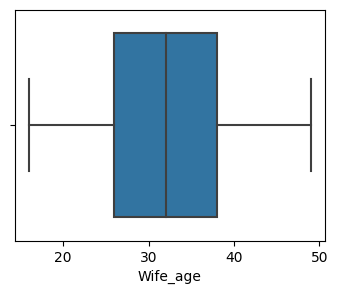

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df,x="Wife_age");

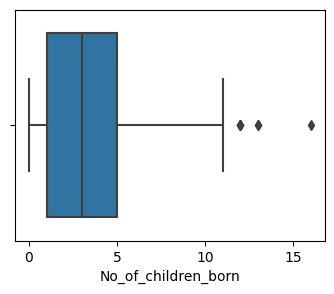

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df,x="No_of_children_born");

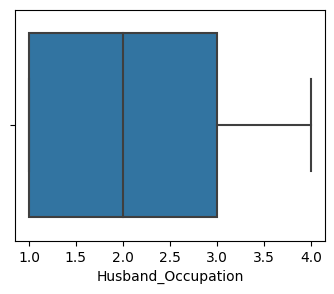

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df,x="Husband_Occupation");

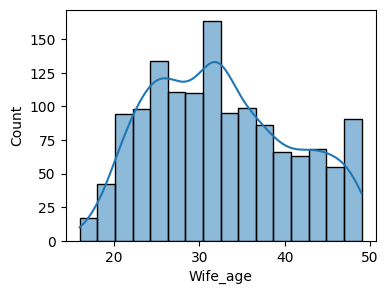

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x="Wife_age",kde=True);

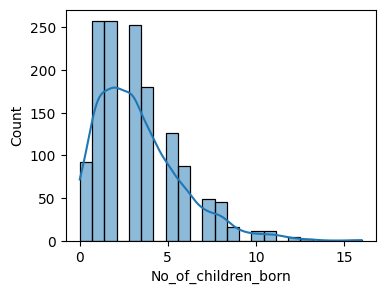

In [ ]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x="No_of_children_born",kde=True);

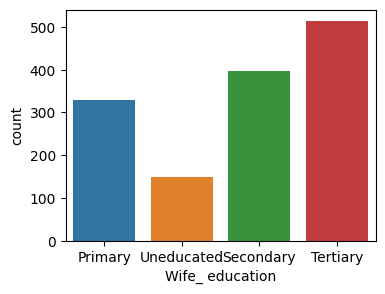

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Wife_ education"]);

In [ ]:
df["Wife_ education"].value_counts()

Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64

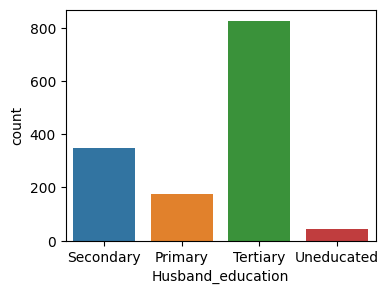

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Husband_education"]);

In [ ]:
df["Husband_education"].value_counts()

Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64

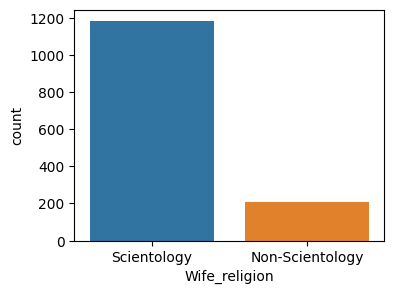

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Wife_religion"]);

In [ ]:
df["Wife_religion"].value_counts()

Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64

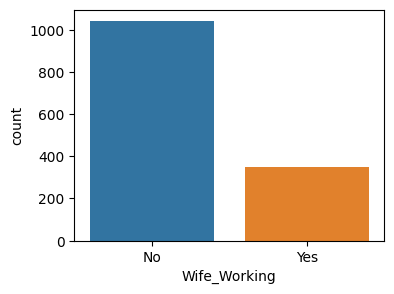

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Wife_Working"]);

In [ ]:
df["Wife_Working"].value_counts()

No     1043
Yes     350
Name: Wife_Working, dtype: int64

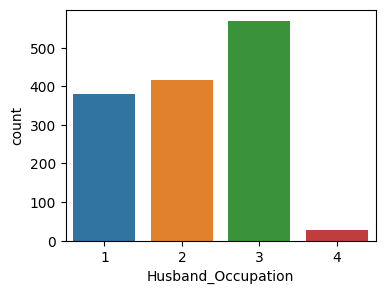

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Husband_Occupation"]);

In [ ]:
df["Husband_Occupation"].value_counts()

3    570
2    415
1    381
4     27
Name: Husband_Occupation, dtype: int64

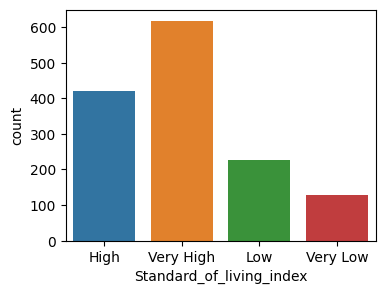

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Standard_of_living_index"]);

In [ ]:
df["Standard_of_living_index"].value_counts()

Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64

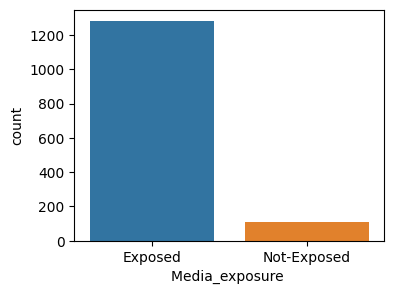

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Media_exposure "]);

In [ ]:
df["Media_exposure "].value_counts()

Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64

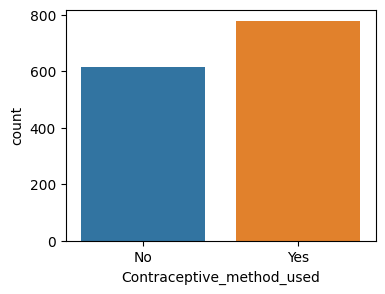

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Contraceptive_method_used"]);

In [ ]:
df["Contraceptive_method_used"].value_counts()

Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64

#Insights from Univariate analysis:
* Wife_age variable is normally distributed.
* Number of children variable is right skewed.
* In wife education variable, there are 515 members who are highly (tertiary) educated followed by 398 people who completed Secondary education, 330 members who completed Primary education and 150 members who are uneducated in the data.
* In husband education variable, there are 827 members who are highly (tertiary) educated followed by 347 people who completed Secondary education, 175 members who completed Primary education and 44 members who are uneducated in the data.
* In wife religion variable, there are more number of female who believe in Scientology than who are non- Scientologists. Number of females who are Scientologists in the data set are 1186 and who are Non Scientologists are 207.
* There are more females who aren’t working than the number of females who are working.There are 1043 females who aren’t working and 350 females who are working.
* Husbands whose occupation is category 3 are more compared to other type of occupations.There are 570 members who are working in category 3, 415 members in category 2, 381 members working category 1 and 27 members whose occupation is category 4.
* People who have very high standard of living index are more in the given data,
The number of people who have very high standard of living index are 618, followed by people having high standard of living index with 419, people who have low standard of living index are 227 and very low are 129 people, which by the least members.
* People who are exposed to the media are very high when compared with non-exposed people.
* People who used contraceptive method are more the people who haven’t used it

<Axes: xlabel='Contraceptive_method_used', ylabel='No_of_children_born'>

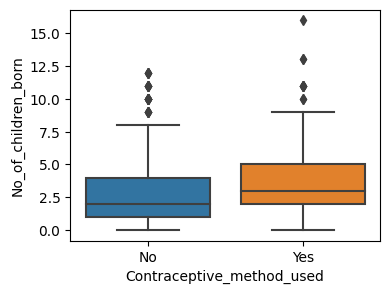

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["Contraceptive_method_used"],y=df["No_of_children_born"])

<Axes: xlabel='Contraceptive_method_used', ylabel='Wife_age'>

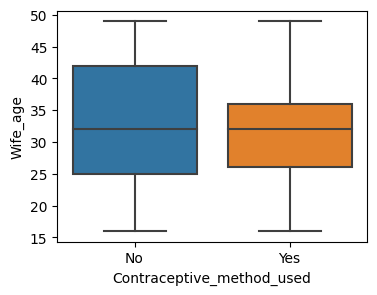

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["Contraceptive_method_used"],y=df["Wife_age"])

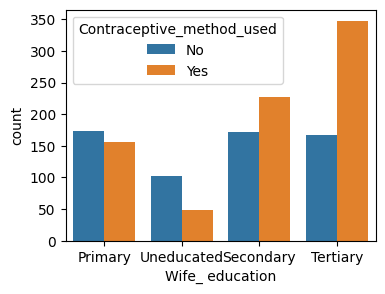

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Wife_ education"],hue=df["Contraceptive_method_used"]);

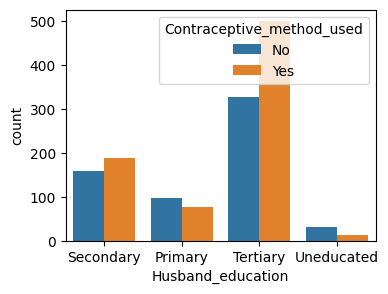

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Husband_education"],hue=df["Contraceptive_method_used"]);

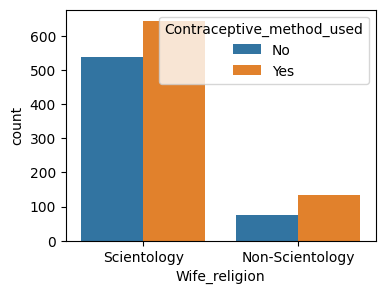

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Wife_religion"],hue=df["Contraceptive_method_used"]);

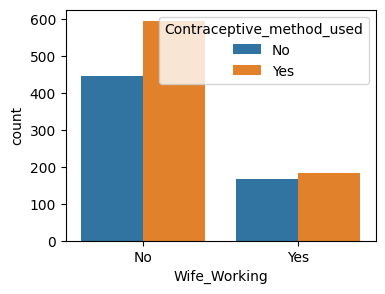

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Wife_Working"],hue=df["Contraceptive_method_used"]);

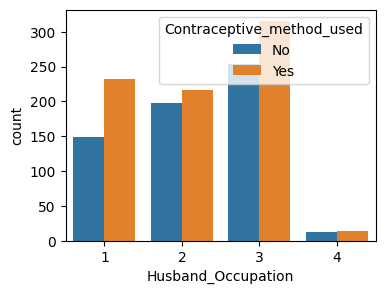

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Husband_Occupation"],hue=df["Contraceptive_method_used"]);

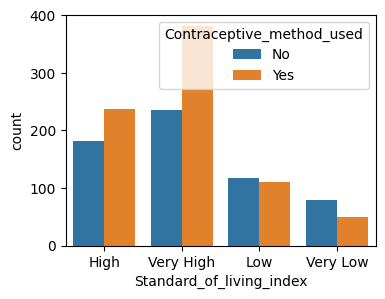

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Standard_of_living_index"],hue=df["Contraceptive_method_used"]);

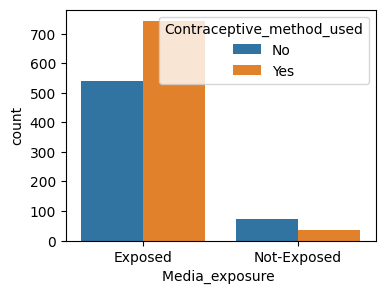

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df["Media_exposure "],hue=df["Contraceptive_method_used"]);

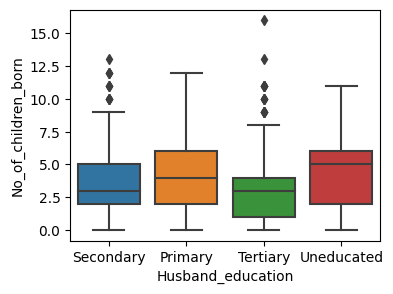

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["Husband_education"],y=df["No_of_children_born"]);

In [ ]:
pd.crosstab(df["Husband_education"],df["No_of_children_born"],margins=True)

No_of_children_born,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,16.0,All
Husband_education,,,,,,,,,,,,,,,,
Primary,11,25,27,24,19,16,16,10,17,6,1,2,1,0,0,175
Secondary,16,65,62,54,47,32,28,17,10,5,4,3,3,1,0,347
Tertiary,61,163,165,169,111,70,39,19,14,5,4,5,0,1,1,827
Uneducated,4,4,4,6,3,8,5,3,4,0,2,1,0,0,0,44
All,92,257,258,253,180,126,88,49,45,16,11,11,4,2,1,1393


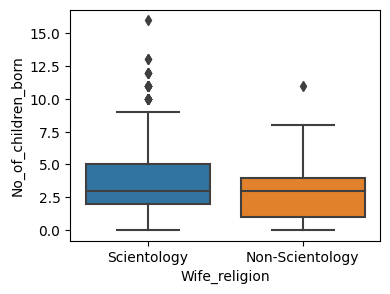

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["Wife_religion"],y=df["No_of_children_born"]);

In [ ]:
pd.crosstab(df["Wife_religion"],df["No_of_children_born"],margins=True)

No_of_children_born,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,16.0,All
Wife_religion,,,,,,,,,,,,,,,,
Non-Scientology,15,39,37,55,29,14,11,5,1,0,0,1,0,0,0,207
Scientology,77,218,221,198,151,112,77,44,44,16,11,10,4,2,1,1186
All,92,257,258,253,180,126,88,49,45,16,11,11,4,2,1,1393


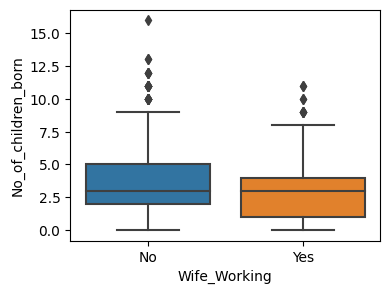

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["Wife_Working"],y=df["No_of_children_born"]);

In [ ]:
pd.crosstab(df["Wife_Working"],df["No_of_children_born"],margins=True)

No_of_children_born,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,16.0,All
Wife_Working,,,,,,,,,,,,,,,,
No,49,189,195,188,140,98,70,38,40,11,9,9,4,2,1,1043
Yes,43,68,63,65,40,28,18,11,5,5,2,2,0,0,0,350
All,92,257,258,253,180,126,88,49,45,16,11,11,4,2,1,1393


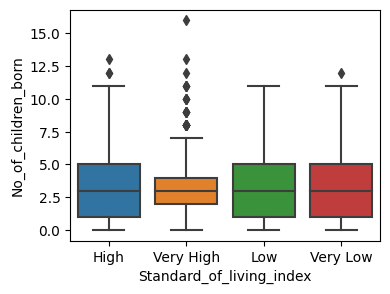

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df["Standard_of_living_index"],y=df["No_of_children_born"]);

In [ ]:
pd.crosstab(df["Standard_of_living_index"],df["No_of_children_born"],margins=True)

No_of_children_born,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,16.0,All
Standard_of_living_index,,,,,,,,,,,,,,,,
High,24,82,93,56,58,33,26,15,15,6,5,3,2,1,0,419
Low,19,42,38,35,29,24,18,6,9,2,2,3,0,0,0,227
Very High,38,103,108,140,80,59,37,23,14,5,4,4,1,1,1,618
Very Low,11,30,19,22,13,10,7,5,7,3,0,1,1,0,0,129
All,92,257,258,253,180,126,88,49,45,16,11,11,4,2,1,1393


In [ ]:
pd.crosstab(df["Media_exposure "],df["Standard_of_living_index"],margins=True)

Standard_of_living_index,High,Low,Very High,Very Low,All
Media_exposure,,,,,
Exposed,397,187,600,100,1284
Not-Exposed,22,40,18,29,109
All,419,227,618,129,1393


<Axes: xlabel='Wife_age', ylabel='No_of_children_born'>

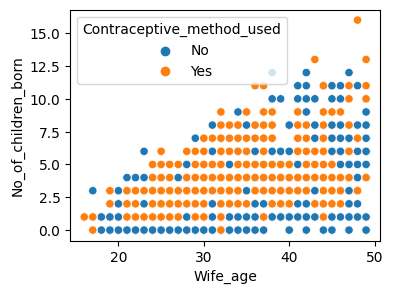

In [ ]:
plt.figure(figsize=(4,3))
sns.scatterplot(x=df["Wife_age"],y=df["No_of_children_born"],hue="Contraceptive_method_used",data=df)

#Insights from Bivariate analysis:
* People who used contraceptive method have more number of children when compared to who haven’t used contraceptive method.
* Husbands who have tertiary education have more number of children followed by secondary education.
*  Wife Religion Vs Number of children born,the female who believe in Scientology have more number of children compared to the females who doesn’t believe in Scientology.
* Wife Working Vs Number of Children born,the wives who aren’t working had more number of children when compared to the working wives.
* Standard of living index Vs Number of children born,the people with very high standard of living have more number of children and who have very low standard of living index have less number of children compared to the others.
* Wife Age vs Number of children born with hue Contraceptive used,there is a slight positive correlation between wife age and number of children born.
* Women having more number of children use contraceptive.
* Age of wife doesnt have much effect on contraceptive use.
* Wives who are uneducated and who have primary education dont use contraceptive.
* Wives who are highly educated use contraceptive more.
* Women whose husband is highly educated use contraceptive.
* Wives religion doesnt much affect contraceptive usage.
* Wives who are not working dont use contraceptive as much as wives who are working.
* Husband occupation doesnt much affect contraceptive usage.
* Women who have low and very low standard of living index doesnt use contraceptive much and who have high standard of living index use contraceptive.
* Women who do not have media exposure use contraceptive less compared to women who have median exposure.

In [ ]:
pd.crosstab([df["Wife_ education"],df["Wife_religion"]],df["Standard_of_living_index"],margins=True)

Standard_of_living_index         High  Low  Very High  Very Low   All
Wife_ education Wife_religion                                        
Primary         Non-Scientology     5    6         11         0    22
                Scientology        95   65         93        55   308
Secondary       Non-Scientology    14    4         32         2    52
                Scientology       120   77        114        35   346
Tertiary        Non-Scientology    24    4        100         2   130
                Scientology       116   34        229         6   385
Uneducated      Non-Scientology     1    1          0         1     3
                Scientology        44   36         39        28   147
All                               419  227        618       129  1393

In [ ]:
pd.crosstab([df["Wife_ education"],df["Wife_religion"]],df["Contraceptive_method_used"],margins=True)

Contraceptive_method_used         No  Yes   All
Wife_ education Wife_religion                  
Primary         Non-Scientology   11   11    22
                Scientology      163  145   308
Secondary       Non-Scientology   19   33    52
                Scientology      152  194   346
Tertiary        Non-Scientology   42   88   130
                Scientology      125  260   385
Uneducated      Non-Scientology    2    1     3
                Scientology      100   47   147
All                              614  779  1393

#Insights from multivariate analysis:
* Wives who believe in scientology from tertiary education level are those who have a very high standard of living index, followed by wives who believe in scientology from secondary education level and those who doesn’t believe
scientology are also from tertiary education level who have a very high standard of living index.

#Label Encoding:
* In the given data, we have variables which are of object data types; there are some ordinal variables and some binary variables.
* By using Label encoding and one-hot encoding, we can convert object data types in to numerical.
* Variables such as Wife Education, Husband education, Standard of Living Index and Contraceptive method are converted by using Label encoding and by using np.where function.
* Variables – Wife Religion, Wife Working and Media Exposure are encoded using one hot encoding and by using drop first function.

In [ ]:
df["Wife_ education"]=np.where(df["Wife_ education"]=="Uneducated",1,df["Wife_ education"])
df["Wife_ education"]=np.where(df["Wife_ education"]=="Primary",2,df["Wife_ education"])
df["Wife_ education"]=np.where(df["Wife_ education"]=="Secondary",3,df["Wife_ education"])
df["Wife_ education"]=np.where(df["Wife_ education"]=="Tertiary",4,df["Wife_ education"])

In [ ]:
df["Wife_ education"].value_counts()

4    515
3    398
2    330
1    150
Name: Wife_ education, dtype: int64

In [ ]:
df["Husband_education"]=np.where(df["Husband_education"]=="Uneducated",1,df["Husband_education"])
df["Husband_education"]=np.where(df["Husband_education"]=="Primary",2,df["Husband_education"])
df["Husband_education"]=np.where(df["Husband_education"]=="Secondary",3,df["Husband_education"])
df["Husband_education"]=np.where(df["Husband_education"]=="Tertiary",4,df["Husband_education"])

In [ ]:
df["Husband_education"].value_counts()

4    827
3    347
2    175
1     44
Name: Husband_education, dtype: int64

In [ ]:
df["Standard_of_living_index"].value_counts()

Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64

In [ ]:
df["Standard_of_living_index"]=np.where(df["Standard_of_living_index"]=="Very Low",1,df["Standard_of_living_index"])
df["Standard_of_living_index"]=np.where(df["Standard_of_living_index"]=="Low",2,df["Standard_of_living_index"])
df["Standard_of_living_index"]=np.where(df["Standard_of_living_index"]=="High",3,df["Standard_of_living_index"])
df["Standard_of_living_index"]=np.where(df["Standard_of_living_index"]=="Very High",4,df["Standard_of_living_index"])

In [ ]:
df["Standard_of_living_index"].value_counts()

4    618
3    419
2    227
1    129
Name: Standard_of_living_index, dtype: int64

In [ ]:
df["Contraceptive_method_used"].value_counts()

Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64

In [ ]:
df["Contraceptive_method_used"]=np.where(df["Contraceptive_method_used"]=="Yes",1,df["Contraceptive_method_used"])
df["Contraceptive_method_used"]=np.where(df["Contraceptive_method_used"]=="No",0,df["Contraceptive_method_used"])

In [ ]:
df["Contraceptive_method_used"].value_counts()

1    779
0    614
Name: Contraceptive_method_used, dtype: int64

In [ ]:
df["Wife_ education"]=df["Wife_ education"].astype("int64")
df["Husband_education"]=df["Husband_education"].astype("int64")
df["Standard_of_living_index"]=df["Standard_of_living_index"].astype("int64")
df["Contraceptive_method_used"]=df["Contraceptive_method_used"].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 119.7+ KB


In [ ]:
df_new=pd.get_dummies(df,columns=["Wife_religion","Wife_Working","Media_exposure "],drop_first=True)
df_new.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Contraceptive_method_used,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure _Not-Exposed
0,24.0,2,3,3.0,2,3,0,1,0,0
1,45.0,1,3,10.0,3,4,0,1,0,0
2,43.0,2,3,7.0,3,4,0,1,0,0
3,42.0,3,2,9.0,3,3,0,1,0,0
4,36.0,3,3,8.0,3,2,0,1,0,0


In [ ]:
df_new["Contraceptive_method_used"].value_counts()

1    779
0    614
Name: Contraceptive_method_used, dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wife_age                     1393 non-null   float64
 1   Wife_ education              1393 non-null   int64  
 2   Husband_education            1393 non-null   int64  
 3   No_of_children_born          1393 non-null   float64
 4   Husband_Occupation           1393 non-null   int64  
 5   Standard_of_living_index     1393 non-null   int64  
 6   Contraceptive_method_used    1393 non-null   int64  
 7   Wife_religion_Scientology    1393 non-null   uint8  
 8   Wife_Working_Yes             1393 non-null   uint8  
 9   Media_exposure _Not-Exposed  1393 non-null   uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 91.1 KB


In [ ]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Wife_age,1393.0,32.530510,8.088188,16.0,26.0,32.0,38.0,49.0
Wife_ education,1393.0,2.917444,1.015507,1.0,2.0,3.0,4.0,4.0
Husband_education,1393.0,3.404882,0.825965,1.0,3.0,4.0,4.0,4.0
No_of_children_born,1393.0,3.286432,2.381791,0.0,1.0,3.0,5.0,16.0
Husband_Occupation,1393.0,2.174444,0.854590,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1393.0,3.095477,0.984179,1.0,2.0,3.0,4.0,4.0
Contraceptive_method_used,1393.0,0.559225,0.496658,0.0,0.0,1.0,1.0,1.0
Wife_religion_Scientology,1393.0,0.851400,0.355822,0.0,1.0,1.0,1.0,1.0
Wife_Working_Yes,1393.0,0.251256,0.433891,0.0,0.0,0.0,1.0,1.0
Media_exposure _Not-Exposed,1393.0,0.078248,0.268658,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='Wife_age'>

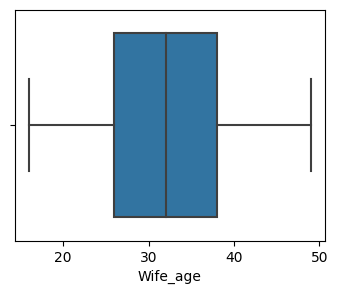

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df_new,x="Wife_age")

<Axes: xlabel='Wife_ education'>

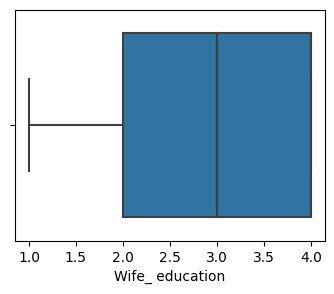

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df_new,x="Wife_ education")

<Axes: xlabel='Husband_education'>

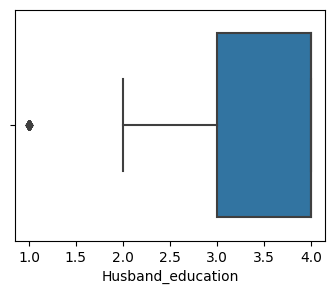

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df_new,x="Husband_education")

<Axes: xlabel='No_of_children_born'>

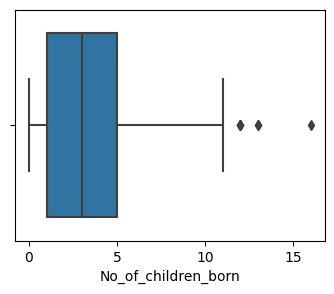

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df_new,x="No_of_children_born")

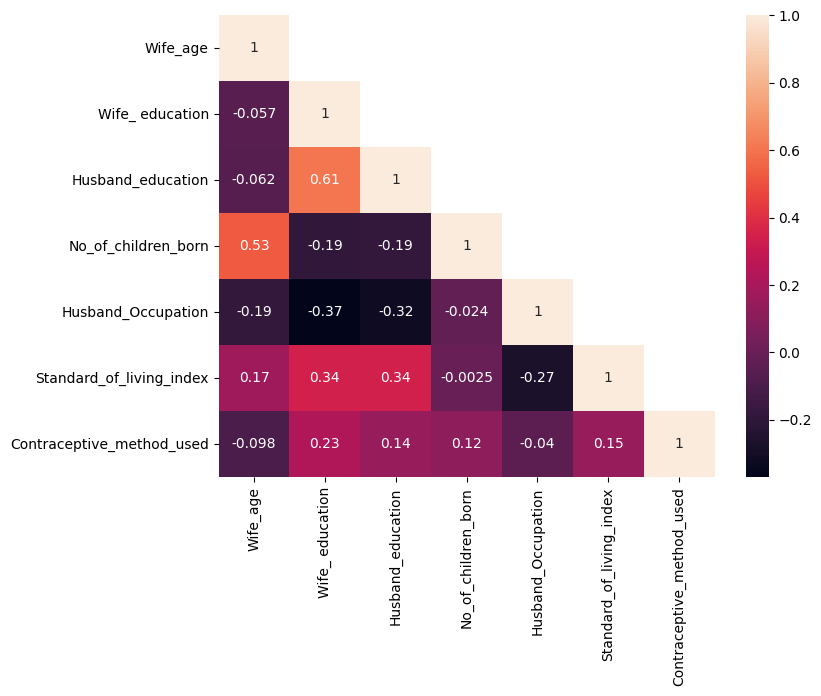

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.iloc[:,0:10].corr(),annot=True,cbar=True,mask=np.triu(df.iloc[:,0:10].corr(),+1))
plt.show()

#Splitting the data set using train test split
* By using train test split from sklearn model selection, splitted the data into train and test data.
* Dropped Contraceptive method used variable from the data set and stored remaining data in “X” and Contraceptive method used variable into “y”.
* Train and Test data are split in the ratio of 70:30 and random state as 1.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=df_new.drop(["Contraceptive_method_used"],axis=1)
y=df_new["Contraceptive_method_used"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Husband_Occupation,Standard_of_living_index,Wife_religion_Scientology,Wife_Working_Yes,Media_exposure _Not-Exposed
336,34.0,4,3,0.0,3,3,0,1,0
781,37.0,4,4,3.0,2,4,1,0,0
433,37.0,4,4,2.0,3,3,1,1,0
588,29.0,4,4,2.0,3,4,1,0,0
468,24.0,1,4,1.0,4,2,1,1,1


In [ ]:
y_train.value_counts()

1    553
0    422
Name: Contraceptive_method_used, dtype: int64

#Logistic Regression

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
ytrain_predict=model.predict(X_train)
ytest_predict=model.predict(X_test)

In [ ]:
y_trainprobs=model.predict_proba(X_train)
y_testprobs=model.predict_proba(X_test)

In [ ]:
y_trainprobs=y_trainprobs[:,1]

In [ ]:
y_testprobs=y_testprobs[:,1]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve
auc_train=roc_auc_score(y_train,y_trainprobs)
auc_train

0.7246535485032095

In [ ]:
auc_test=roc_auc_score(y_test,y_testprobs)
auc_test

0.6584047750737463

In [ ]:
print(confusion_matrix(y_train,ytrain_predict))
print(classification_report(y_train,ytrain_predict))

[[223 199]
 [ 98 455]]
              precision    recall  f1-score   support

           0       0.69      0.53      0.60       422
           1       0.70      0.82      0.75       553

    accuracy                           0.70       975
   macro avg       0.70      0.68      0.68       975
weighted avg       0.70      0.70      0.69       975



In [ ]:
tn,fp,fn,tp=confusion_matrix(y_train,ytrain_predict).ravel()
tn,fp,fn,tp

(223, 199, 98, 455)

In [ ]:
print(confusion_matrix(y_test,ytest_predict))
print(classification_report(y_test,ytest_predict))

[[ 87 105]
 [ 50 176]]
              precision    recall  f1-score   support

           0       0.64      0.45      0.53       192
           1       0.63      0.78      0.69       226

    accuracy                           0.63       418
   macro avg       0.63      0.62      0.61       418
weighted avg       0.63      0.63      0.62       418



In [ ]:
tn,fp,fn,tp=confusion_matrix(y_test,ytest_predict).ravel()
tn,fp,fn,tp

(87, 105, 50, 176)

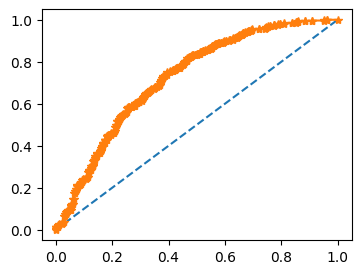

In [ ]:
plt.figure(figsize=(4,3))
fpr,tpr,thresholds=roc_curve(y_train,y_trainprobs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

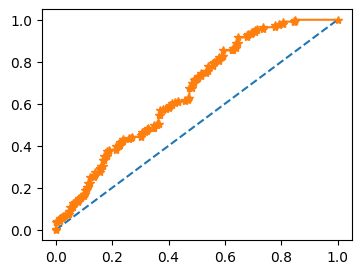

In [ ]:
plt.figure(figsize=(4,3))
fpr,tpr,thresholds=roc_curve(y_test,y_testprobs)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

* From sklearn linear model imported LogisticRegression.
* X_train and y_train are fitted into the model.
* Predictions of y_train and y_test predictions were made using model.predict for X_train and y_train.
* Probabilities of y_train and y_test were calculated by using model.predict_proba for X_train and X_test.
* Out of 975 values of training data, model predicted 233 true Negative, 455 true positive, 199 False Positives and 98 False Negatives.
* Out of 418 values of testing data, model predicted 87 true Negative, 176 true
positive, 105 False Positives and 50 False Negatives.


#Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model1=LDA()
model1.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_trainpredict1=model1.predict(X_train)
y_testpredict1=model1.predict(X_test)

In [ ]:
y_trainprobs1=model1.predict_proba(X_train)
y_testprobs1=model1.predict_proba(X_test)

In [ ]:
y_trainprobs1=y_trainprobs1[:,1]

In [ ]:
y_testprobs1=y_testprobs1[:,1]

In [ ]:
print(confusion_matrix(y_train,y_trainpredict1))
print(classification_report(y_train,y_trainpredict1))

[[217 205]
 [ 95 458]]
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       422
           1       0.69      0.83      0.75       553

    accuracy                           0.69       975
   macro avg       0.69      0.67      0.67       975
weighted avg       0.69      0.69      0.68       975



In [ ]:
tn,fp,fn,tp=confusion_matrix(y_train,y_trainpredict1).ravel()
tn,fp,fn,tp

(217, 205, 95, 458)

In [ ]:
print(confusion_matrix(y_test,y_testpredict1))
print(classification_report(y_test,y_testpredict1))

[[ 82 110]
 [ 48 178]]
              precision    recall  f1-score   support

           0       0.63      0.43      0.51       192
           1       0.62      0.79      0.69       226

    accuracy                           0.62       418
   macro avg       0.62      0.61      0.60       418
weighted avg       0.62      0.62      0.61       418



In [ ]:
tn,fp,fn,tp=confusion_matrix(y_test,y_testpredict1).ravel()
tn,fp,fn,tp

(82, 110, 48, 178)

In [ ]:
auc_train1=roc_auc_score(y_train,y_trainprobs1)
auc_train1

0.7236358338404052

In [ ]:
auc_test1=roc_auc_score(y_test,y_testprobs1)
auc_test1

0.6563997971976402

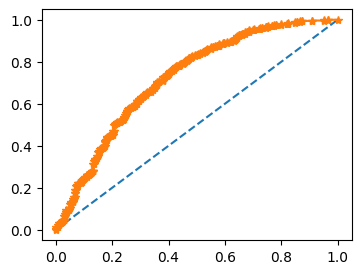

In [ ]:
plt.figure(figsize=(4,3))
fpr,tpr,thresholds=roc_curve(y_train,y_trainprobs1)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

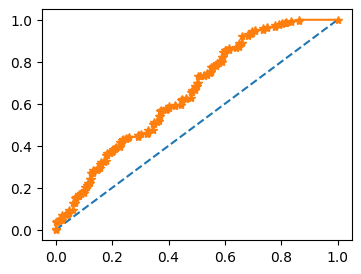

In [ ]:
plt.figure(figsize=(4,3))
fpr,tpr,thresholds=roc_curve(y_test,y_testprobs1)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

* From sklearn discriminant analysis imported Linear Discriminant Analysis.
* X_train and y_train are fitted into the model.
* Predictions of y_train and y_test predictions were made using model.predict for X_train and y_train.
* Probabilities of y_train and y_test were calculated by using model.predict_proba for X_train and X_test.
* Out of 975 values of training data LDA model predicted, 217 as True Negatives, 458 as True Positives, 205 as False Positives and 95 as False Negatives.
* Out of 418 values of testing data LDA model predicted, 82 True Negatives, 178 True Positives, 110 False Positives and 48 False Negatives.


#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree
train_char_label=["No","Yes"]
tree_file=open("/content/drive/MyDrive/tree.dot","w")

In [ ]:
dot_file=tree.export_graphviz(dt_model,out_file=tree_file,feature_names=list(X_train),class_names=train_char_label)

In [ ]:
tree_file.close()

In [ ]:
reg_dt_model=DecisionTreeClassifier(criterion="gini",max_depth=7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [ ]:
data_file=open("/content/drive/MyDrive/reg_tree.dot","w")

In [ ]:
reg_file=tree.export_graphviz(reg_dt_model,out_file=data_file,feature_names=list(X_train),class_names=train_char_label)
data_file.close()

In [ ]:
print(pd.DataFrame(reg_dt_model.feature_importances_,columns=["Imp"],index=X_train.columns))

                                  Imp
Wife_age                     0.259989
Wife_ education              0.142921
Husband_education            0.044169
No_of_children_born          0.449977
Husband_Occupation           0.038074
Standard_of_living_index     0.026879
Wife_religion_Scientology    0.007681
Wife_Working_Yes             0.030310
Media_exposure _Not-Exposed  0.000000


In [ ]:
y_trainpredict3=reg_dt_model.predict(X_train)
y_testpredict3=reg_dt_model.predict(X_test)

In [ ]:
y_trainprobs3=reg_dt_model.predict_proba(X_train)
y_testprobs3=reg_dt_model.predict_proba(X_test)

In [ ]:
y_trainprobs3=y_trainprobs3[:,1]

In [ ]:
y_testprobs3=y_testprobs3[:,1]

In [ ]:
auc_model3=roc_auc_score(y_train,y_trainprobs3)
auc_model3

0.8241903276398447

In [ ]:
auc_model4=roc_auc_score(y_test,y_testprobs3)
auc_model4

0.6985734697640118

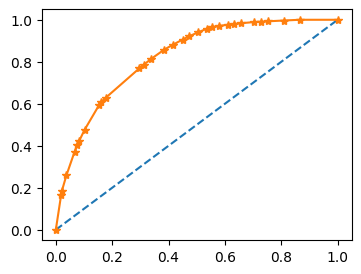

In [ ]:
plt.figure(figsize=(4,3))
fpr,tpr,thresholds=roc_curve(y_train,y_trainprobs3)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

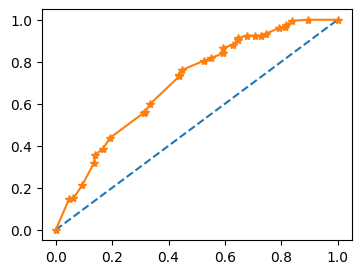

In [ ]:
plt.figure(figsize=(4,3))
fpr,tpr,thresholds=roc_curve(y_test,y_testprobs3)
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr,marker="*")
plt.show()

In [ ]:
print(confusion_matrix(y_train,y_trainpredict3))
print(classification_report(y_train,y_trainpredict3))

[[260 162]
 [ 79 474]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.68       422
           1       0.75      0.86      0.80       553

    accuracy                           0.75       975
   macro avg       0.76      0.74      0.74       975
weighted avg       0.75      0.75      0.75       975



In [ ]:
tn,fp,fn,tp=confusion_matrix(y_train,y_trainpredict3).ravel()
tn,fp,fn,tp

(260, 162, 79, 474)

In [ ]:
print(confusion_matrix(y_test,y_testpredict3))
print(classification_report(y_test,y_testpredict3))

[[ 91 101]
 [ 44 182]]
              precision    recall  f1-score   support

           0       0.67      0.47      0.56       192
           1       0.64      0.81      0.72       226

    accuracy                           0.65       418
   macro avg       0.66      0.64      0.64       418
weighted avg       0.66      0.65      0.64       418



In [ ]:
tn,fp,fn,tp=confusion_matrix(y_test,y_testpredict3).ravel()
tn,fp,fn,tp

(91, 101, 44, 182)

* From sklearn.tree imported Decision Tree classifier.
* Created reg_model by using Decision tree classifier with criterion gini index, maximum depth, minimum samples leaf and minimum sample split.
* Created a dot file and loaded the data into model
* Out of 975 values of train data Decision Tree predicted, 260 True Negatives, 474 True Positives, 162 False Positives and 79 False Negatives.
* Out of 418 values of testing data Decision Tree model predicted 91 True Negatives, 182 True Positives, 101 False Positives and 44 False Negatives.


#Best Model:
* Decision Tree model is the best model for this business problem and Accuracy is the best metric as both the classes are important.
* Contraceptive method not using:
 * Precision (77%) – 77% predicted women are not using contraceptives of all
the women who are not using them.
 * Recall (62%) – Of all the women who are not using contraceptives, 62% of
women were correctly predicted.
* Contraceptive method using:
 * Precision (75%) – 75% predicted women are using contraceptives of all the
women who are using them.
 * Recall (86%) – Of all the women who are using contraceptives, 86% of
women were correctly predicted.
 * Overall accuracy of the model – 75% of all predictions are correct.

#Business Insights:
* No of children born is the most important variable in problem and women who have more number of children tend to use contraceptives.
* Wife age is the 2nd most important variable in the problem.
* Wife education is the 3rd important variable in the problem.
* Husband education is the 4th most important variable.
* Husband occupation is also important.
#Recommendations:
* Raising public awareness and education about the usage of contraceptive to women through media exposure can help women in taking decisions in using contraceptives.
* Promoting female education and empowerment, as this can increase their awareness and autonomy in making reproductive choices.
* Providing more opportunities and incentives for husbands to have higher-skilled and higher-paying occupations, as this can improve their family’s standard of living and reduce their preference for having more children.
